In [ ]:
import os

kaggle_dir = '/root/.kaggle'
os.makedirs(kaggle_dir, exist_ok=True)

!cp kaggle.json {kaggle_dir}/
!chmod 600 {kaggle_dir}/kaggle.json


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

^C


In [ ]:
!unzip '*.zip'

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:


import pandas as pd
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')
print('test.csv head:\n', test_df.head())
print('\ntrain.csv head:\n', train_df.head())


test.csv head:
         id_code
0  0005cfc8afb6
1  003f0afdcd15
2  006efc72b638
3  00836aaacf06
4  009245722fa4

train.csv head:
         id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [ ]:


print(train_df['diagnosis'].unique())


[2 4 1 0 3]


In [ ]:


print(train_df['diagnosis'].value_counts())


diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64


Images for diagnosis 2:


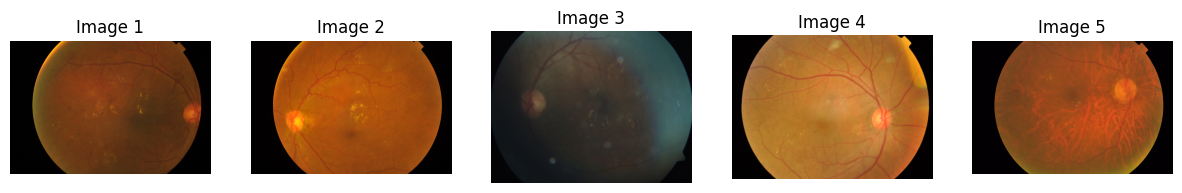

Images for diagnosis 4:


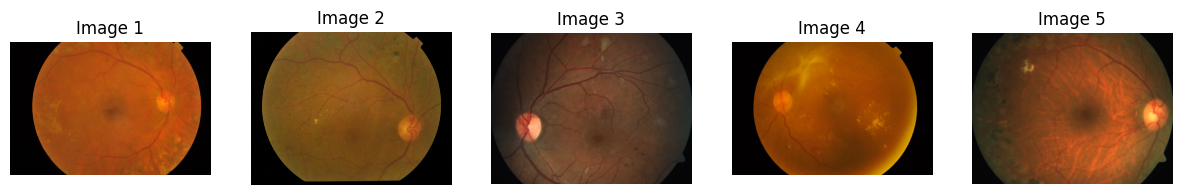

Images for diagnosis 1:


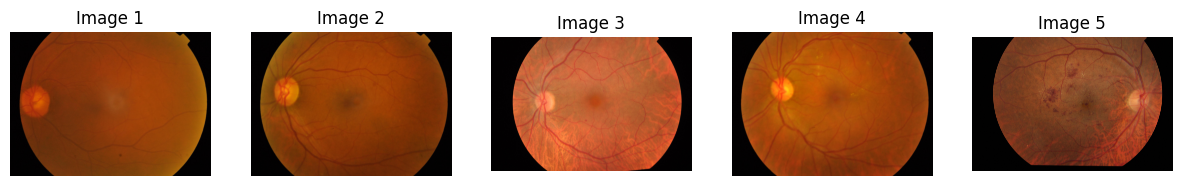

Images for diagnosis 0:


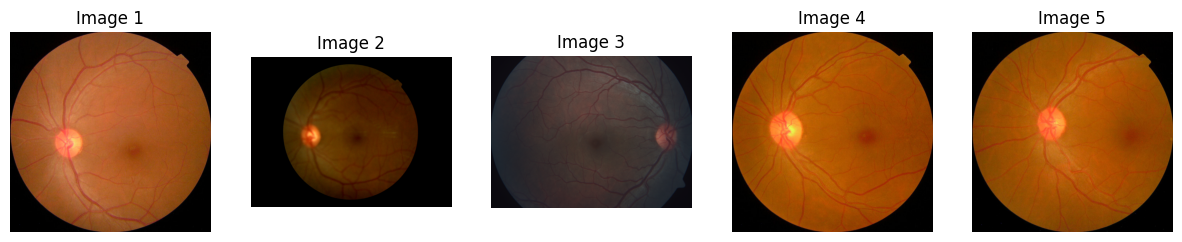

Images for diagnosis 3:


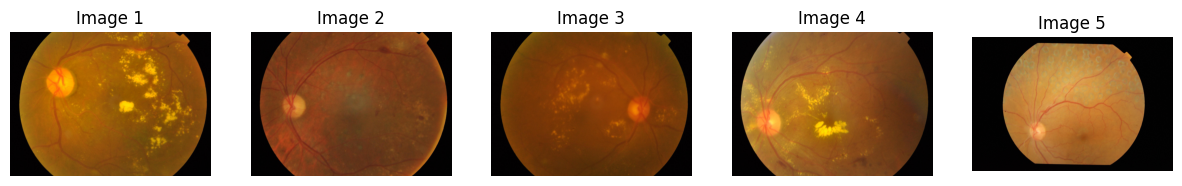

In [ ]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

diagnosis_values = train_df['diagnosis'].unique()

for diagnosis in diagnosis_values:
  diagnosis_images = train_df[train_df['diagnosis'] == diagnosis]['id_code'].head(5)
  print(f"Images for diagnosis {diagnosis}:")

  fig, axes = plt.subplots(1, len(diagnosis_images), figsize=(15, 5))
  for i, image_id in enumerate(diagnosis_images):
      image_path = f'/content/train_images/{image_id}.png'
      try:
        img = mpimg.imread(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
      except FileNotFoundError:
        print(f"Error: Image file not found for {image_id}")
        axes[i].axis('off')
  plt.show()


some images are flipped and rotated at random angles,
size of images are varying

In [ ]:
# Install required packages
!pip install efficientnet-pytorch
!pip install ptflops  # Optional, for model complexity analysis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=baa23fd3990630ae35815ac5372f44772cfcc94d5d363822a

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.optim import Adam, lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import cohen_kappa_score, accuracy_score
from PIL import Image, ImageFile
from efficientnet_pytorch import EfficientNet
from google.colab import drive
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:

# Mount Google Drive to access/save data
drive.mount('/content/drive')

Mounted at /content/drive


Using cuda device
Train Size = 3662
Test Size = 1928
Number of training batches: 92
Number of validation batches: 23


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 130MB/s] 
<ipython-input-9-5c2a59091ef2>:232: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if device.type == 'cuda' else None


Total trainable parameters: 4,336,769
Epoch 1/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:16<00:00,  6.05s/it]


train Loss: 1.1940 Acc: 0.5997


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:20<00:00,  6.12s/it]


val Loss: 0.8997 Acc: 0.7473 Kappa: 0.7828
Saved model with improved kappa: 0.7828

Epoch 2/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:24<00:00,  6.13s/it]


train Loss: 0.8556 Acc: 0.7655


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:21<00:00,  6.14s/it]


val Loss: 0.8679 Acc: 0.7240 Kappa: 0.8661
Saved model with improved kappa: 0.8661

Epoch 3/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:15<00:00,  6.04s/it]


train Loss: 0.8309 Acc: 0.7744


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:21<00:00,  6.17s/it]


val Loss: 0.8397 Acc: 0.7664 Kappa: 0.8516

Epoch 4/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:07<00:00,  5.95s/it]


train Loss: 0.8061 Acc: 0.7908


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:20<00:00,  6.09s/it]


val Loss: 0.7959 Acc: 0.7964 Kappa: 0.8725
Saved model with improved kappa: 0.8725

Epoch 5/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:18<00:00,  6.08s/it]


train Loss: 0.7753 Acc: 0.8055


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:23<00:00,  6.22s/it]


val Loss: 0.7759 Acc: 0.8074 Kappa: 0.8827
Saved model with improved kappa: 0.8827

Epoch 6/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:19<00:00,  6.08s/it]


train Loss: 0.7411 Acc: 0.8184


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:22<00:00,  6.18s/it]


val Loss: 0.7859 Acc: 0.7910 Kappa: 0.8813

Epoch 7/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [08:59<00:00,  5.86s/it]


train Loss: 0.7087 Acc: 0.8396


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:22<00:00,  6.20s/it]


val Loss: 0.7419 Acc: 0.8402 Kappa: 0.8980
Saved model with improved kappa: 0.8980

Epoch 8/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:16<00:00,  6.05s/it]


train Loss: 0.6899 Acc: 0.8515


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:23<00:00,  6.26s/it]


val Loss: 0.7116 Acc: 0.8429 Kappa: 0.9028
Saved model with improved kappa: 0.9028

Epoch 9/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:14<00:00,  6.03s/it]


train Loss: 0.6517 Acc: 0.8686


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:22<00:00,  6.19s/it]


val Loss: 0.7482 Acc: 0.8292 Kappa: 0.9018

Epoch 10/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:25<00:00,  6.15s/it]


train Loss: 0.6324 Acc: 0.8826


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:21<00:00,  6.15s/it]


val Loss: 0.7393 Acc: 0.8279 Kappa: 0.8914

Epoch 11/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:15<00:00,  6.04s/it]


train Loss: 0.6003 Acc: 0.8949


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:21<00:00,  6.15s/it]


val Loss: 0.7418 Acc: 0.8443 Kappa: 0.9104
Saved model with improved kappa: 0.9104

Epoch 12/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:08<00:00,  5.97s/it]


train Loss: 0.5642 Acc: 0.9113


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:22<00:00,  6.18s/it]


val Loss: 0.7462 Acc: 0.8511 Kappa: 0.8995

Epoch 13/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:22<00:00,  6.11s/it]


train Loss: 0.5451 Acc: 0.9270


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:20<00:00,  6.09s/it]


val Loss: 0.7470 Acc: 0.8511 Kappa: 0.9032

Epoch 14/15
----------


train:   0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
train: 100%|██████████| 92/92 [09:15<00:00,  6.04s/it]


train Loss: 0.5298 Acc: 0.9365


val:   0%|          | 0/23 [00:00<?, ?it/s]<ipython-input-9-5c2a59091ef2>:278: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast() if scaler else torch.no_grad():
val: 100%|██████████| 23/23 [02:22<00:00,  6.21s/it]


val Loss: 0.7500 Acc: 0.8402 Kappa: 0.9006

Early stopping after 14 epochs with no improvement


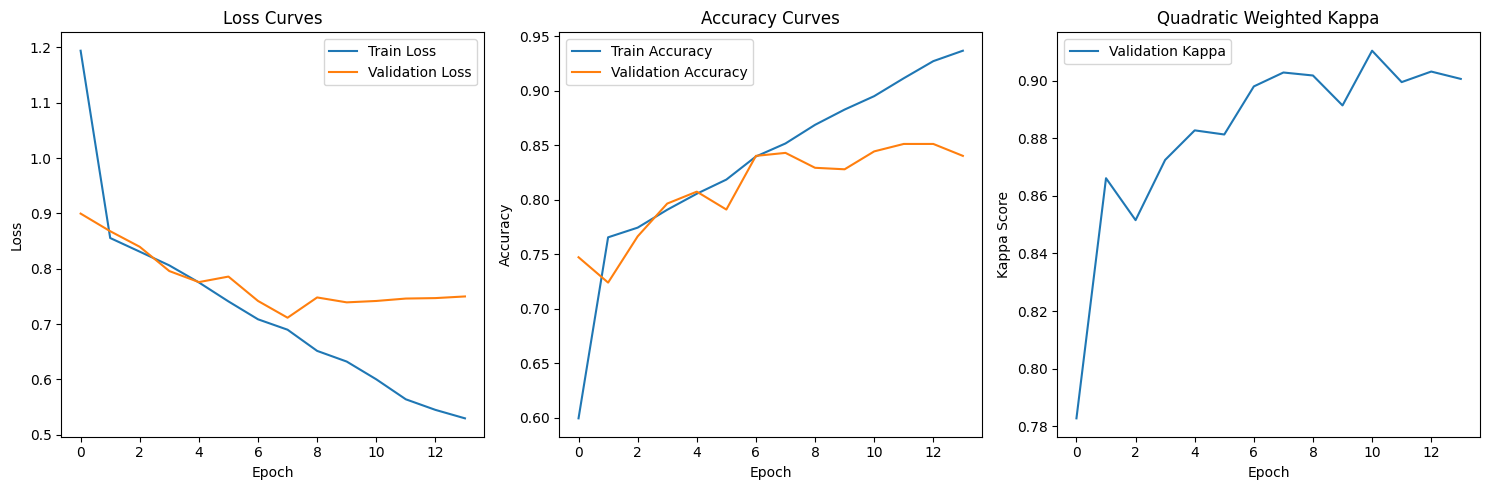

Predicting: 100%|██████████| 61/61 [02:11<00:00,  2.15s/it]

Submission file created!


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
from sklearn.metrics import cohen_kappa_score, accuracy_score
from PIL import Image
import cv2
from tqdm import tqdm

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

BASE_DIR = "/content/"
TRAIN_CSV = os.path.join(BASE_DIR, "train.csv")
TEST_CSV = os.path.join(BASE_DIR, "test.csv")
TRAIN_IMGS = os.path.join(BASE_DIR, "train_images")
TEST_IMGS = os.path.join(BASE_DIR, "test_images")

# Create folders if they don't exist
os.makedirs(BASE_DIR, exist_ok=True)
os.makedirs(TRAIN_IMGS, exist_ok=True)
os.makedirs(TEST_IMGS, exist_ok=True)

# Load the data
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

print(f'Train Size = {len(train_df)}')
print(f'Test Size = {len(test_df)}')

# Display data distribution
def plot_class_distribution(df):
    counts = df['diagnosis'].value_counts()
    class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']

    # Create a mapping for visualization
    mapping = {}
    for i, label in enumerate(class_list):
        if i in counts.index:
            mapping[label] = counts[i]
        else:
            mapping[label] = 0

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(mapping.keys()), y=list(mapping.values()), alpha=0.8, palette='bright')
    plt.title('Distribution of Output Classes')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Target Classes', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# plot_class_distribution(train_df)

# Image preprocessing and augmentation
class EyeDataset(Dataset):
    def __init__(self, df, img_dir, transform=None, test=False):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        self.test = test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]['id_code']
        img_path = os.path.join(self.img_dir, f"{img_name}.png")

        # Read image using OpenCV for preprocessing
        image = cv2.imread(img_path)

        # Image preprocessing (crop black borders, enhance contrast)
        image = self.preprocess_image(image)

        if self.transform:
            image = self.transform(image)

        if self.test:
            return image
        else:
            label = self.df.iloc[idx]['diagnosis']
            return image, label

    def preprocess_image(self, image):
        # Convert to RGB (OpenCV uses BGR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert to grayscale for preprocessing
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Find the non-black region (crop black borders)
        mask = gray > 10
        if mask.any():
            rows = np.any(mask, axis=1)
            cols = np.any(mask, axis=0)
            rmin, rmax = np.where(rows)[0][[0, -1]]
            cmin, cmax = np.where(cols)[0][[0, -1]]

            # Add some padding
            padding = 10
            rmin = max(0, rmin - padding)
            rmax = min(image.shape[0], rmax + padding)
            cmin = max(0, cmin - padding)
            cmax = min(image.shape[1], cmax + padding)

            # Crop the image
            image = image[rmin:rmax, cmin:cmax]

        # Apply CLAHE for contrast enhancement
        lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        l = clahe.apply(l)
        lab = cv2.merge((l, a, b))
        image = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

        return image

# Define transforms with more augmentations for regularization
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = EyeDataset(train_df, TRAIN_IMGS, transform=train_transforms)

# Split into train and validation sets
valid_size = 0.2
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.seed(42)  # For reproducibility
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Create data loaders
batch_size = 32  # Smaller batch size for better generalization
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=2)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(valid_loader)}")

from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

class EfficientDRModel(nn.Module):
    def __init__(self, num_classes=5):
        super(EfficientDRModel, self).__init__()
        # Use pre-trained EfficientNet-B0 with fewer parameters than ResNet152
        self.effnet = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Replace classifier with custom head
        num_ftrs = self.effnet.classifier[1].in_features
        self.effnet.classifier = nn.Identity()

        # Add custom classifier with dropout for regularization
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(num_ftrs, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        features = self.effnet(x)
        return self.classifier(features)

# Initialize model
model = EfficientDRModel(num_classes=5)
model = model.to(device)

# Calculate parameters for comparison
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params:,}")

# Use Label Smoothing Cross Entropy for better generalization
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Use AdamW optimizer with weight decay for regularization
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# OneCycleLR scheduler for faster convergence
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=1e-3,
    epochs=15,
    steps_per_epoch=len(train_loader),
    pct_start=0.2
)

# Mixed precision training for faster computation on GPU
scaler = torch.cuda.amp.GradScaler() if device.type == 'cuda' else None

# Function to calculate quadratic weighted kappa score
def quadratic_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

# Training function with mixed precision
def train_model(model, criterion, optimizer, scheduler, num_epochs=15, patience=3):
    best_kappa = 0.0
    best_model_wts = None
    no_improve_epochs = 0

    # History for plotting
    history = {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': [],
        'val_kappa': []
    }

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = valid_loader

            running_loss = 0.0
            all_labels = []
            all_preds = []

            # Iterate over data
            for inputs, labels in tqdm(dataloader, desc=phase):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    with torch.cuda.amp.autocast() if scaler else torch.no_grad():
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        if scaler:
                            scaler.scale(loss).backward()
                            scaler.step(optimizer)
                            scaler.update()
                        else:
                            loss.backward()
                            optimizer.step()
                        scheduler.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

            epoch_loss = running_loss / len(dataloader.sampler)
            epoch_acc = accuracy_score(all_labels, all_preds)

            # Calculate quadratic kappa for validation
            if phase == 'val':
                epoch_kappa = quadratic_kappa(all_labels, all_preds)
                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} Kappa: {epoch_kappa:.4f}')
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc)
                history['val_kappa'].append(epoch_kappa)

                # Deep copy the model if best validation kappa so far
                if epoch_kappa > best_kappa:
                    best_kappa = epoch_kappa
                    best_model_wts = copy.deepcopy(model.state_dict())
                    no_improve_epochs = 0

                    # Save the best model
                    torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'kappa': best_kappa
                    }, 'best_dr_model.pt')
                    print(f'Saved model with improved kappa: {best_kappa:.4f}')
                else:
                    no_improve_epochs += 1
            else:
                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc)

        print()

        # Early stopping
        if no_improve_epochs >= patience:
            print(f'Early stopping after {epoch+1} epochs with no improvement')
            break

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, history

# Train the model
import copy
model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=15, patience=3)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history['val_kappa'], label='Validation Kappa')
plt.title('Quadratic Weighted Kappa')
plt.xlabel('Epoch')
plt.ylabel('Kappa Score')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on the test dataset
test_dataset = EyeDataset(test_df, TEST_IMGS, transform=valid_transforms, test=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

def predict(model, test_loader):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for inputs in tqdm(test_loader, desc='Predicting'):
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())

    return all_preds

# Make predictions
predictions = predict(model, test_loader)

# Create submission file
submission = pd.DataFrame({
    'id_code': test_df['id_code'],
    'diagnosis': predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")